# PROLOGUE
* Before setting up your requests, secure a Binance account https://www.binance.us/en/home  
* and create an API https://www.binance.us/en/usercenter/settings/api-management be sure to save the secret key immediately, as it will never be displayed after the first time
* Refer to https://binance-docs.github.io/apidocs/ and https://github.com/sammchardy/python-binance/blob/master/binance/client.py to step through the API functionality

# SETUP
## Import modules

In [54]:
# for all 
import requests
import BinanceK # this is my .py file with secret code

# for POST, PUT, DELETE transactions on Trade, Margin and User Data:
from urllib.parse import urlencode # Convert a mapping object or a sequence of two-element tuples, which may contain str or bytes objects, to a percent-encoded ASCII text string.  https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode
import hashlib # will handle hashing any raw message in an encrypted format https://www.askpython.com/python-modules/python-hashlib-module
import hmac # message authentication for MD5, SHA-1, in combination with a secret shared key. https://www.geeksforgeeks.org/hmac-keyed-hashing-message-authentication/

In [55]:
# Check for Keys
print(len(BinanceK.secretK))
print(len(BinanceK.clientcode))

64
64


# GET DATA
## Connect to Binance
Connect to Binance RESTful APIs.  Data is returned in JSON format.

In [4]:
# NO Security Key Needed for server time
base_url = "https://api.binance.com"
url_end =  "/api/v3/time"
url = base_url + url_end
print(url)
headers = {
            'Accept': 'application/json',
            'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36', 
        } # ref def _get_headers https://github.com/sammchardy/python-binance/blob/master/binance/client.py

response = requests.request("GET", url, headers=headers)
print(response.status_code) # Check the status of the endpoint
SvrTime = response.json()
SvrTime

https://api.binance.com/api/v3/time
200


{'serverTime': 1636503328400}

In [5]:
# API Key needed for Market data
base_url = "https://api.binance.com"
url_end = "/api/v3/depth"
url = base_url + url_end
headers = {
            'Accept': 'application/json',
            'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36', 
        } # ref def _get_headers https://github.com/sammchardy/python-binance/blob/master/binance/client.py
# Set API-Key
headers['X-MBX-APIKEY'] = BinanceK.clientcode # ref Endpoint Security Type https://binance-docs.github.io/apidocs/spot/en/#endpoint-security-type

# Set Parameters
parameters = {'symbol':'BTCUSDT'}

response = requests.request("GET", url, headers=headers, params=parameters)
print(response.status_code) # Check the status of the endpoint
Depth = response.json()
Depth

https://api.binance.com/api/v3/depth
200


{'lastUpdateId': 14893393475,
 'bids': [['67151.45000000', '0.06800000'],
  ['67150.00000000', '0.01491000'],
  ['67146.79000000', '0.00372000'],
  ['67145.38000000', '0.00034000'],
  ['67143.27000000', '0.06800000'],
  ['67142.83000000', '0.11160000'],
  ['67141.46000000', '0.05807000'],
  ['67141.45000000', '0.15391000'],
  ['67141.01000000', '0.22397000'],
  ['67140.03000000', '0.03452000'],
  ['67139.89000000', '0.20000000'],
  ['67139.54000000', '0.23000000'],
  ['67139.05000000', '0.02500000'],
  ['67137.93000000', '0.00104000'],
  ['67137.60000000', '0.25611000'],
  ['67134.87000000', '0.00186000'],
  ['67134.37000000', '0.00016000'],
  ['67132.94000000', '0.05000000'],
  ['67132.24000000', '0.14299000'],
  ['67132.23000000', '0.11164000'],
  ['67132.18000000', '0.00074000'],
  ['67131.79000000', '0.00372000'],
  ['67131.70000000', '0.01030000'],
  ['67131.65000000', '0.01000000'],
  ['67131.14000000', '0.03000000'],
  ['67131.13000000', '0.24191000'],
  ['67130.69000000', '0.00

## Define a function for repeatable data retrieval

In [32]:
## Function to return data from binance endpoints
def binance_response(endpoint_url, **prams):
    base_url = "https://api.binance.com"
    url_end = endpoint_url
    url = base_url + url_end
    print("Returning", url)
    headers = {
            'Accept': 'application/json',
            'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',  # noqa
        }
    headers['X-MBX-APIKEY'] = BinanceK.clientcode
    parameters = {**prams}
    response = requests.request("GET", url, headers=headers, params=parameters)
    status = response.status_code
    print("Status Code", status)
    if status < 300 or status > 500: # binance internal error codes are in the 500 series
        json_fmt = response.json()
        return json_fmt

#### Explore endpoints
There are so many endpoints (4 Categories, 15 Subcategories within Spot/Margin)

In [3]:
# Import Pandas for storing endpoint data
import pandas as pd


In [36]:
# Run the function to get Orders data
depth = binance_response("/api/v3/depth", **{'symbol':'BTCUSDT'})

Returning https://api.binance.com/api/v3/depth
Status Code 200


In [37]:
depth
# this is a dictionary with 3 keys: lastUpdateID, bids, asks

{'lastUpdateId': 14899618377,
 'bids': [['66760.00000000', '2.76952000'],
  ['66759.98000000', '0.00313000'],
  ['66759.96000000', '0.00313000'],
  ['66756.77000000', '0.00066000'],
  ['66753.76000000', '0.10567000'],
  ['66753.75000000', '0.01972000'],
  ['66753.32000000', '0.06800000'],
  ['66749.55000000', '0.03286000'],
  ['66749.54000000', '0.09374000'],
  ['66745.90000000', '0.03140000'],
  ['66745.89000000', '0.06800000'],
  ['66745.28000000', '0.01000000'],
  ['66745.19000000', '0.02147000'],
  ['66743.34000000', '0.07489000'],
  ['66741.65000000', '0.05842000'],
  ['66740.01000000', '0.05842000'],
  ['66739.40000000', '0.03000000'],
  ['66738.07000000', '0.01193000'],
  ['66736.57000000', '0.09785000'],
  ['66735.33000000', '0.18559000'],
  ['66735.17000000', '0.00749000'],
  ['66735.03000000', '0.25856000'],
  ['66734.68000000', '0.00063000'],
  ['66733.61000000', '0.11233000'],
  ['66733.15000000', '0.06800000'],
  ['66732.16000000', '0.02500000'],
  ['66730.93000000', '0.04

In [38]:
# Look at the first 5 (lowest priced) asks
depth["asks"][0:5]

[['66760.01000000', '0.37459000'],
 ['66760.02000000', '0.16245000'],
 ['66760.55000000', '0.11234000'],
 ['66761.07000000', '0.07489000'],
 ['66762.84000000', '0.02438000']]

In [39]:
# Structure the data into a list that can be put into a Dataframe
df_list = []
for side in ["bids", "asks"]:
    df = pd.DataFrame(depth[side], columns=["price", "quantity"], dtype = float)
    df["side"] = side
    df_list.append(df)

print(df_list)

[       price  quantity  side
0   66760.00   2.76952  bids
1   66759.98   0.00313  bids
2   66759.96   0.00313  bids
3   66756.77   0.00066  bids
4   66753.76   0.10567  bids
..       ...       ...   ...
95  66697.71   0.06696  bids
96  66696.08   0.10448  bids
97  66695.54   0.15037  bids
98  66695.52   0.00137  bids
99  66695.38   0.00050  bids

[100 rows x 3 columns],        price  quantity  side
0   66760.01   0.37459  asks
1   66760.02   0.16245  asks
2   66760.55   0.11234  asks
3   66761.07   0.07489  asks
4   66762.84   0.02438  asks
..       ...       ...   ...
95  66789.63   0.21000  asks
96  66790.00   0.04503  asks
97  66790.80   0.30000  asks
98  66791.26   0.04203  asks
99  66791.89   0.00375  asks

[100 rows x 3 columns]]


In [40]:
# Concatenate those lists into the Dataframe
df = pd.concat(df_list).reset_index(drop=True)

df.tail()

# Thank you https://towardsdatascience.com/learn-what-a-depth-chart-is-and-how-to-create-it-in-python-323d065e6f86
# Thank you https://stackoverflow.com/users/5845824/jlplenio https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths

,price,quantity,side
195,66789.63,0.21000,asks
196,66790.00,0.04503,asks
197,66790.80,0.30000,asks
198,66791.26,0.04203,asks
199,66791.89,0.00375,asks


# ANALYSIS
## interesting endpoint 1: Depth
Depth chart shows the total quantity of orders at each price requested to buy or sell an asset (stock, cryptocurrency, etc.).

It is split in the middle, which is the price of the asset during the last trade. 
It is organized across the bottom by price. 
On the left side you have the lowest buy order (price) that buyers hope the asset will become so they can buy it affordably. 
On the right you have the highest sell order (price) that sellers hope the asset will become so they can sell it for a large profit.

https://towardsdatascience.com/learn-what-a-depth-chart-is-and-how-to-create-it-in-python-323d065e6f86
https://decryptionary.com/dictionary/depth-chart/
https://river.com/learn/how-to-read-a-bitcoin-depth-chart/ 

In [15]:
### Import Modules for Analysis
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid", {'axes.grid' : True})

%matplotlib inline

In [17]:
# Get data from needed APIs
symbol_pair = {'symbol':'BTCUSDT'}
curprice_endpt = "/api/v3/avgPrice"
orders_endpt   = "/api/v3/depth"
time_endpt     = "/api/v3/time"

# Identify As of date/time
timestp = binance_response(time_endpt)
timestp = datetime.fromtimestamp(timestp['serverTime']/1000)
print(timestp) # looks like EST

# Identify the current average price over the last 5 minutes
cur_price = binance_response(curprice_endpt, **symbol_pair)
cur_price = float(cur_price['price'])
print(cur_price)

# Get the current Orders data
depth = binance_response(orders_endpt, **symbol_pair)

# Convert Orders data to dataframe
df_list = []
for side in ["bids", "asks"]:
    df = pd.DataFrame(depth[side], columns=["price", "quantity"], dtype = float)
    df["side"] = side
    df_list.append(df)
depth = pd.concat(df_list).reset_index(drop=True)
depth

Returning https://api.binance.com/api/v3/time
Status Code 200
2021-11-09 19:16:19.515000
Returning https://api.binance.com/api/v3/avgPrice
Status Code 200
66995.29544888
Returning https://api.binance.com/api/v3/depth
Status Code 200


,price,quantity,side
0,67223.38,1.20000,bids
1,67221.83,0.37500,bids
2,67221.69,0.50000,bids
3,67221.49,0.30000,bids
4,67219.14,0.25000,bids
...,...,...,...
195,67269.56,0.00016,asks
196,67269.79,0.02469,asks
197,67270.06,0.01216,asks
198,67270.55,0.00086,asks


In [18]:
# Chart Title:
Title = symbol_pair['symbol']+" Order Book - Depth Chart As Of "+str(timestp)
print(Title)


BTCUSDT Order Book - Depth Chart As Of 2021-11-09 19:16:19.515000


In [19]:
# For placement of Annotations:

# Identify maximum bid
max_bid = float(depth[depth['side'] == 'bids']['price'].max())
print(max_bid)

# Identify minimum overall price
min_price = float(depth['price'].min())
print(min_price)

# Identify maximum overall price
max_price = float(depth['price'].max())
print(max_price)

# Identify average quantity
ave_qty = int(depth['quantity'].sum()/(2*2)) # placement 1/4 of the way up
print(ave_qty)

67223.38
67151.78
67270.58
6


In [20]:
# Plot Formatting for current price arrow
offset = 0.6
leng = 0.2
# Set up current price arrow
if cur_price > max_price:
    cur_x = max_price
    cur_col = 'red'
    cur_y = (ave_qty*(1+offset))
    cur_yarr = cur_y*(1+leng)
elif cur_price < min_price:
    cur_x = min_price
    cur_col = 'green'
    cur_y = (ave_qty*(1-offset))
    cur_yarr = cur_y-(1+leng)
else: 
    cur_x = cur_price
    cur_col = 'blue'
    if cur_price > max_bid:
        cur_y = (ave_qty*(1+offset))
        cur_yarr = cur_y*(1+leng)
    else:
        cur_y = (ave_qty*(1-offset))
        cur_yarr = cur_y-(1+leng)

An empirical cumulative distribution function (ECDF) plot, like a histogram, shows a count of observations.  However, they are not grouped into bins, so you see each unique value in the dataset. https://seaborn.pydata.org/generated/seaborn.ecdfplot.html

If the current average price over the last 5 minutes is significantly *higher* than the mid-market price, this may identify a 'buy' opportunity because you could get the shares for less than the median current price.

These prices move very quickly, though!  So, it may be best to have a bot set up to post the 'ask' if it meets a particular rule.

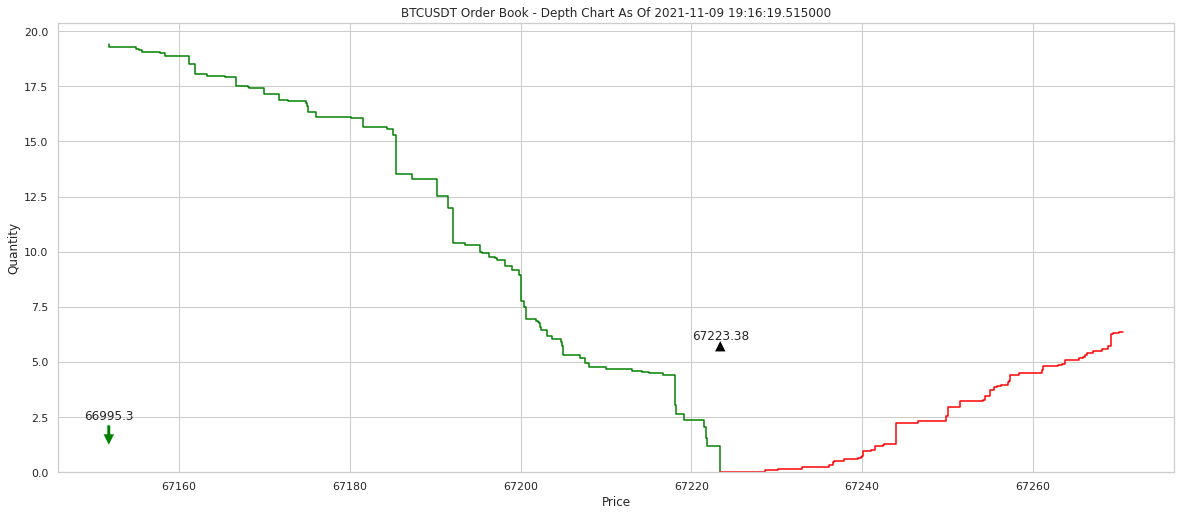

In [21]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.set_title(Title)
sns.ecdfplot(x="price", weights="quantity", stat="count", 
             complementary=True, data=depth.query("side == 'bids'"), 
             color="green", ax=ax)
sns.ecdfplot(x="price", weights="quantity", stat="count", 
             data=depth.query("side == 'asks'"), color='red', 
             ax=ax)
ax.set_xlabel("Price")
ax.set_ylabel("Quantity")

# Label Mid-Market Price and Current 5-minute Average price
ax.annotate(xy=(max_bid, ave_qty),
            text=(str(round(max_bid,ave_qty))),
            arrowprops=dict(facecolor='black'),
             horizontalalignment='center')
ax.annotate(text=(str(round(cur_price,2))),
            xy=(cur_x, cur_yarr), xytext=(cur_x,cur_y),
            arrowprops=dict(facecolor=cur_col),
             horizontalalignment='center');
# https://towardsdatascience.com/learn-what-a-depth-chart-is-and-how-to-create-it-in-python-323d065e6f86

### interesting endpoint 2: Klines for Moving Average

One key buy/sell strategy is:
* Buy when a short term moving average is under the long term moving average
* Sell when the short term moving average is above the long term moving average

For traditional stocks, a key metric is 200 versus 50 - day moving averages.
Crypto moves fast, so this chart will show the 20 versus 5 - day moving averages.

https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a   
-- Pratik Nabriya

In [42]:
# get K-Line data for every day
BTCKline = binance_response("/api/v3/klines", **{'symbol': 'BTCUSDT', 'interval':'1d'})
df = pd.DataFrame(BTCKline)
df.head(2)

Returning https://api.binance.com/api/v3/klines
Status Code 200


,0,1,2,3,4,5,6,7,8,9,10,11
0,1593388800000,9116.16000000,9238.00000000,9024.67000000,9192.56000000,42120.29326100,1593475199999,384206326.47068040,434299,20449.09779600,186542867.41056208,0
1,1593475200000,9192.93000000,9205.00000000,9064.89000000,9138.55000000,31463.16280100,1593561599999,287781334.51701579,328083,15267.74746700,139674651.10276634,0


In [43]:
# Binance uses a POSIX timestamp
datetime.fromtimestamp(0)

datetime.datetime(1969, 12, 31, 19, 0)

In [44]:
# Update date based on the close timestamp
df[6] = df[6].apply(lambda x: datetime.fromtimestamp(x/1000))
df[4] = df[4].astype(float)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1593388800000,9116.16000000,9238.00000000,9024.67000000,9192.56,42120.29326100,2020-06-29 19:59:59.999,384206326.47068040,434299,20449.09779600,186542867.41056208,0
1,1593475200000,9192.93000000,9205.00000000,9064.89000000,9138.55,31463.16280100,2020-06-30 19:59:59.999,287781334.51701579,328083,15267.74746700,139674651.10276634,0


In [45]:
# Just need close time and close price for this analysis
# drop unneeded columns
df = df[[4,6]].copy()

# rename the columns and reset the index to dates for plotting ease
df.columns = ['ClosePrice','CloseDate']
df.set_index('CloseDate', inplace=True) 
df

,ClosePrice
CloseDate,
2020-06-29 19:59:59.999,9192.56
2020-06-30 19:59:59.999,9138.55
2020-07-01 19:59:59.999,9232.00
2020-07-02 19:59:59.999,9086.54
2020-07-03 19:59:59.999,9058.26
...,...
2021-11-06 19:59:59.999,61470.61
2021-11-07 18:59:59.999,63273.59
2021-11-08 18:59:59.999,67525.83


Text(0, 0.5, 'Price in US Tether Coin')

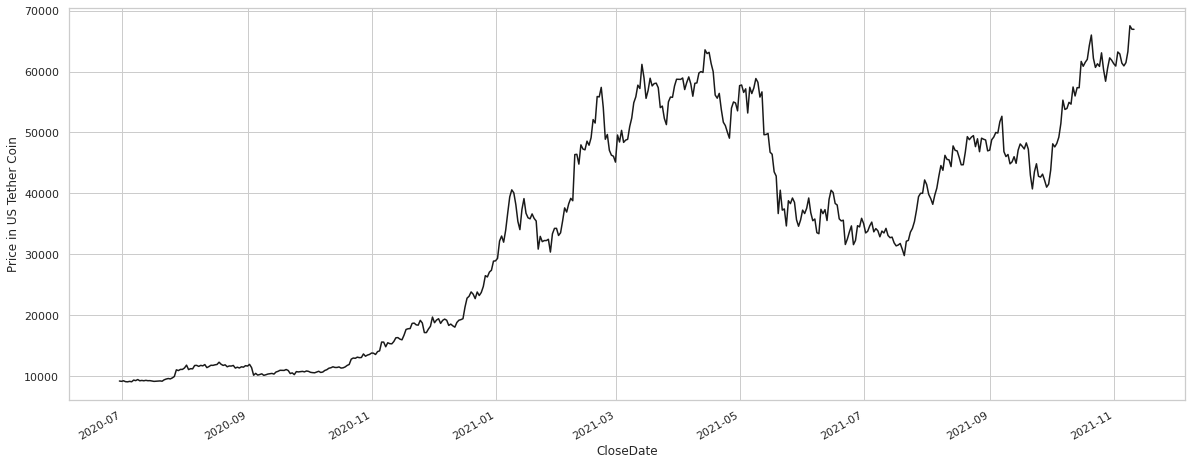

In [46]:
df['ClosePrice'].plot(figsize = (20, 8), color = 'k')
plt.grid(True)
plt.ylabel("Price in US Tether Coin")

In [47]:
# create 20 days simple moving average column
df['20_SMA'] = df['ClosePrice'].rolling(window = 20, min_periods = 20).mean()
# create 5 days simple moving average column
df['5_SMA'] = df['ClosePrice'].rolling(window = 5, min_periods = 5).mean()

In [48]:
# display first few rows
df.tail()

,ClosePrice,20_SMA,5_SMA
CloseDate,,,
2021-11-06 19:59:59.999,61470.61,61797.6060,61983.842
2021-11-07 18:59:59.999,63273.59,61860.7935,61994.562
2021-11-08 18:59:59.999,67525.83,62023.0555,62920.432
2021-11-09 18:59:59.999,66947.66,62070.3680,64030.962
2021-11-10 18:59:59.999,66943.92,62307.9065,65232.322


In [49]:
# A 'buy' signal  = 1
df['Signal'] = 0.0
df['Signal'] = np.where(df['20_SMA'] < df['5_SMA'], 1.0, 0.0)

# Should you buy or sell?
df['Position'] = df['Signal'].diff() #lag difference between rows

In [53]:
df[300:325]

,ClosePrice,20_SMA,5_SMA,Signal,Position
CloseDate,,,,,
2021-04-25 19:59:59.999,49066.77,57237.9340,51143.668,0.0,0.0
2021-04-26 19:59:59.999,54001.39,57038.4460,51186.420,0.0,0.0
2021-04-27 19:59:59.999,55011.97,56991.3720,51850.622,0.0,0.0
2021-04-28 19:59:59.999,54846.22,56829.8070,52594.838,0.0,0.0
2021-04-29 19:59:59.999,53555.00,56600.4300,53296.270,0.0,0.0
2021-04-30 19:59:59.999,57694.27,56496.6870,55021.770,0.0,0.0
2021-05-01 19:59:59.999,57800.37,56386.5840,55781.566,0.0,0.0
2021-05-02 19:59:59.999,56578.21,56222.4945,56094.814,0.0,0.0
2021-05-03 19:59:59.999,57169.39,55902.2140,56559.448,1.0,1.0


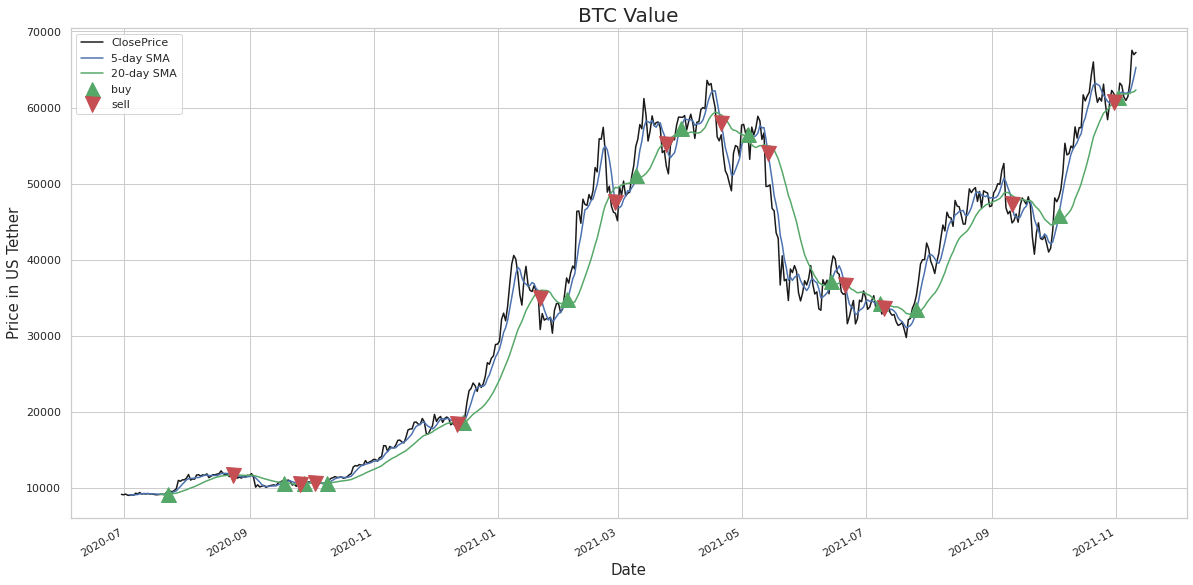

In [28]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['ClosePrice'].plot(color = 'k', label= 'ClosePrice') 
df['5_SMA'].plot(color = 'b',label = "5-day SMA") 
df['20_SMA'].plot(color = 'g', label = "20-day SMA")

# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['5_SMA'][df['Position'] == 1], 
         "^", markersize = 15, color = 'g', label = 'buy')

# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['5_SMA'][df['Position'] == -1], 
         "v", markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in US Tether', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('BTC Value', fontsize = 20)
plt.legend()
plt.grid(True)